#### 1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.
    a. Import the data into a pandas dataframe
    b. Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset
    c. Run either an ARMA, ARIMA, or SARIMA on it
    d. Explain the results


In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv("cupcake_multiTimeline.csv",parse_dates=True, index_col='Year-Month')
df = df.dropna()
df.head()

,Cupcake: (Worldwide)
Year-Month,
2004-01-01,6
2004-02-01,7
2004-03-01,6
2004-04-01,6
2004-05-01,6


<AxesSubplot:xlabel='Year-Month'>

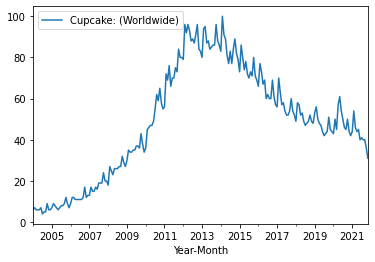

In [60]:
df.plot()

As the data is the Monthly hits for search on 'cupcakes' worldwide. As it is already in month we do not need to aggregate the data further. As the aim is to see if the search for this keyword changes seasonally over the next 12 months. 

However we will still resample it yearly just to see if the mean varies over the years.

In [61]:
df.resample('Y').mean()

,Cupcake: (Worldwide)
Year-Month,
2004-12-31,6.083333
2005-12-31,8.083333
2006-12-31,11.833333
2007-12-31,17.833333
2008-12-31,26.083333
2009-12-31,35.666667
2010-12-31,52.000000
2011-12-31,72.583333
2012-12-31,89.500000


As the data is not stationary, we need to transform the data so that mena and variance of the data remains the same throughout

<AxesSubplot:xlabel='Year-Month'>

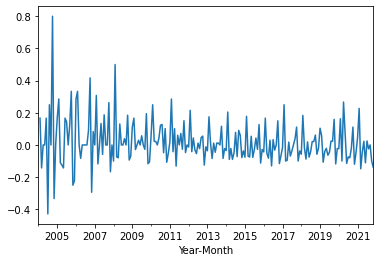

In [62]:
df['data_transform']=df['Cupcake: (Worldwide)'].pct_change()
df['data_transform'].plot()

In [65]:
df = df.dropna()

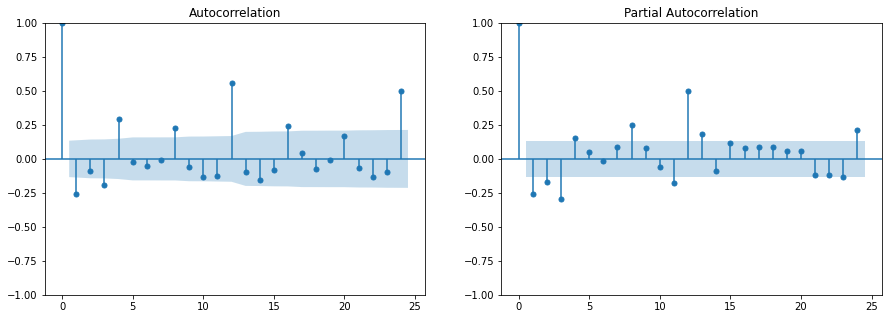

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(15,5))
plot_acf(df[['data_transform']],ax = ax[0])

plot_pacf(df[['data_transform']],ax = ax[1])
plt.show()

In [226]:
#from statsmodels import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['data_transform'],order=(1,1,1), seasonal_order=(0,1,2,12))

In [227]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                          data_transform   No. Observations:                  214
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                 198.827
Date:                                 Fri, 03 Dec 2021   AIC                           -387.655
Time:                                         16:45:21   BIC                           -371.138
Sample:                                     02-01-2004   HQIC                          -380.972
                                          - 11-01-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3581      0.060     -5.951      0.000      -0.476      -0.240
ma.L1         -0.9947      0.054    -18.521      0.000      -1.100      -0.889
ma.S.L12      -0.6007      0.056    -10.653      0.000      -0.711      -0.490
ma.S.L24       0.2164      0.079      2.734      0.006       0.061       0.371
sigma2         0.0077      0.001     14.118      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               302.67
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [228]:
#plot the forecast for cupcake search for the next 12 months

results_df = pd.DataFrame(results.forecast(steps=12))
display(results_df.head())

,predicted_mean
2021-12-01,-0.026843
2022-01-01,0.019852
2022-02-01,0.160987
2022-03-01,-0.127010
2022-04-01,0.094769


<AxesSubplot:title={'center':'Cupcake searches'}>

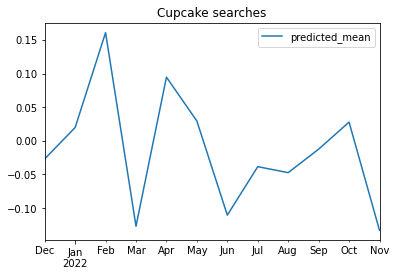

In [229]:
results_df.plot(title = 'Cupcake searches')

The cupcake search trend as predicted goes high in Jan and Feb. Worldwide the search again gies high during spring and fall, dipping in summer. 

#### 2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements.

Fourier Transofrmation transforms the data from time domain to frequency domain. Helps understand frequencies in a signal

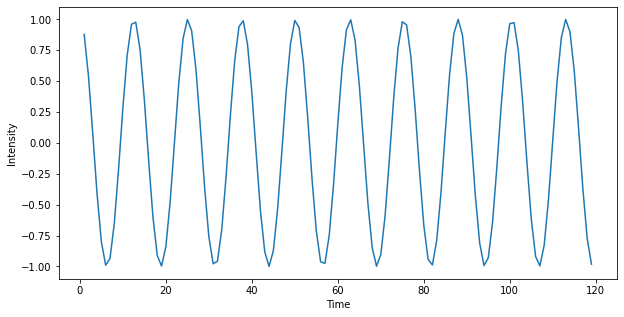

In [240]:
# Plotting Signal y = cos(x/2)
x = np.arange(1,120,1)
y = np.cos(x/2)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

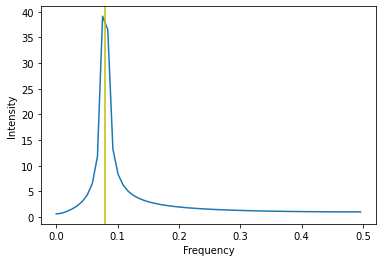

In [245]:
#power spectral density calculation
# FFT

psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
# Plotting the peak line
plt.axvline(1/(4*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()

As is evident after the Fourier transformation that the signal was made form one one high intensity frequency.